![HACKTIV8](datasets/H8.jpeg)

---
# Capstone Project 1

Nama Anggota:
  1. Oktaviani (PYTN-KS16-002)
  2. Gladis Hafifah (PYTN-KS16-001)
  3. Muhammad Rayhan Assegaf (PYTN-KS16-022)
---

## Introduction
"Uber and Lyft Dataset in Boston, Massachusetts" adalah sebuah kumpulan data yang berisikan informasi tentang pemesanan transportasi online yang menggunakan layanan Uber dan Lyft yang terjadi di wilayah kota boston, Massachussets, selama preiode waktu November dan Desember tahun 2018. Datasets ini mencangkup ribuan perjalanan, pola mobilitas perkotaan, preferensi pengguna, dan statistik operasional dari layanan ride-shareing tersebut. Dataset ini bisa membantu pemahaman mengenai bagaimana layanan uber dan lyft dapat beroperasi pada lingkungan perkotaan. Dataset ini diperoleh dari platform Kaggle.

Dataset tersebut mencakup 693071 entries, yang mewakili perjalanan yang dilakukan oleh pengguna Uber dan Lyft, serta 57 atribut yang menggambarkan berbagai aspek dari perjalanan tersebut. Namun, dari 57 atribut tersebut, hanya 10 atribut yang dianggap paling relevan atau penting dalam analisis yang sedang dilakukan. Ini menunjukkan bahwa tidak semua atribut dalam dataset ini memiliki dampak yang sama dalam menjelaskan pola dan karakteristik perjalanan.

This dataset contains:
- id: Unique identifier for each column.
- timestamp: unix timestamp.
- hour: time the online transportation was booked.
- day: date the online transportation was booked.
- month: month the online transportation was booked.
- datetime: the date, month year and hour when the transportation was booked.
- timezone: the time zone when the transportation was booked.
- source: passenger pickup point.
- destination: the passenger's destination point.
- cab_type: type of online transportation.
- product_id: online transportation service.
- price: the price of the ride (US dollars).

### Objective
1. Untuk mengetahui faktor yang mempengaruhi dalam prediksi tarif harga.
2. Memberikan insight yang dapat membantu pengguna atau company dalam bentuk visualisasi.
3. Menentukan akurasi pada algoritma yang digunakan untuk membantu dalam memprediksi tarif harga.

---
---

## Import Library

In [ ]:
# Import pustaka yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.special import boxcox
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [ ]:
df = pd.read_csv('datasets/rideshare_kaggle.csv')

In [ ]:
pd.set_option('display.max.columns', None)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
df.columns.values

array(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperat

In [ ]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [ ]:
df.shape

(693071, 57)

---
## Data Cleaning
### Checking Missing Value

In [ ]:
#mengecheck data dari masing masing atribut apakah terdapat missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
# Menampilkan persentase missing value pada masing masing atribut
df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')

id                              0.0 %
timestamp                       0.0 %
hour                            0.0 %
day                             0.0 %
month                           0.0 %
datetime                        0.0 %
timezone                        0.0 %
source                          0.0 %
destination                     0.0 %
cab_type                        0.0 %
product_id                      0.0 %
name                            0.0 %
price                          7.95 %
distance                        0.0 %
surge_multiplier                0.0 %
latitude                        0.0 %
longitude                       0.0 %
temperature                     0.0 %
apparentTemperature             0.0 %
short_summary                   0.0 %
long_summary                    0.0 %
precipIntensity                 0.0 %
precipProbability               0.0 %
humidity                        0.0 %
windSpeed                       0.0 %
windGust                        0.0 %
windGustTime

Pada hasil tersebut, terdapat missing value pada atribut price diatas 5% atau sekitar 55095 data, dikarenakan missing value tersebut banyak jadi kita tidak bisa sembarangan menghapusnya, maka dari itu kami mengatasinya dengan mengisi nilai yang hilang dengan menggunakan nilai tengah(median) dari atribut price.

### Handling Missing Value

In [ ]:
df['price'].fillna(df['price'].median(), inplace=True)

In [ ]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

### Checking Data Duplicated

In [ ]:
df.duplicated().sum()

0

### Split data

In [ ]:
# Data Split
train, test = train_test_split(df, test_size=0.3, random_state=42)
print('Training set size:', train.shape)
print('Test set size:', test.shape)

Training set size: (485149, 57)
Test set size: (207922, 57)


### Checking Distribution Price

Text(0.5, 1.0, 'Q-Q Plot Price')

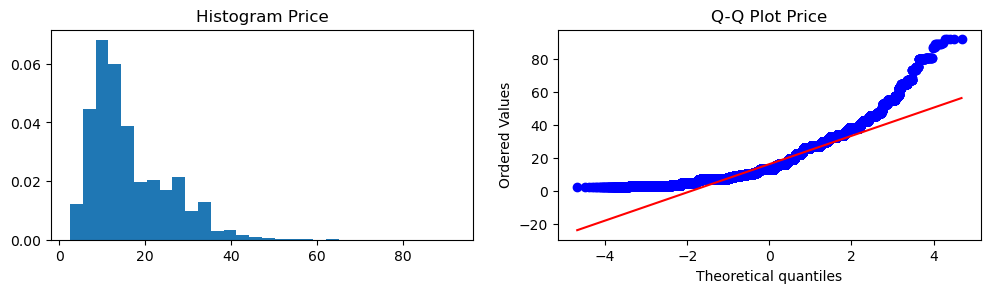

In [ ]:
#Checking distribusi atribut price
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(train['price'], bins=30, density=True)
plt.title('Histogram Price')

plt.subplot(2, 2, 2)
stats.probplot(train['price'], dist='norm', plot=plt)
plt.title('Q-Q Plot Price')

berdasarkan hasil visualisasi diatas, atribut price menunjukkan bahwa memiliki distribusi yang tidak normal, maka dari itu kami melakukan transformasi data, untuk menjadikan atribut tersebut berdistribusi normal atau mendekati normal

### Transform Distribusi Price

In [ ]:
# Melakukan transformasi pada atribut price menggunakan BoxCox Transformation
train['price'], fitted_lambda = stats.boxcox(train['price'])
test['price'] = boxcox(test['price'], fitted_lambda)

Text(0.5, 1.0, 'Q-Q Plot Price')

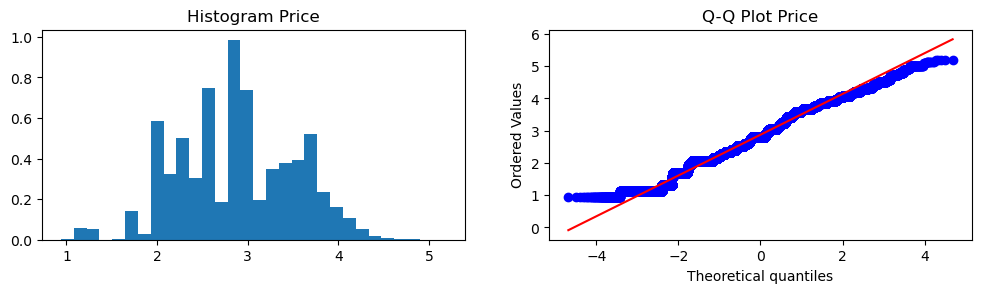

In [ ]:
#Checking distribusi atribut price setelah di transform
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(train['price'], bins=30, density=True)
plt.title('Histogram Price')

plt.subplot(2, 2, 2)
stats.probplot(train['price'], dist='norm', plot=plt)
plt.title('Q-Q Plot Price')

### Checking Outlier Price

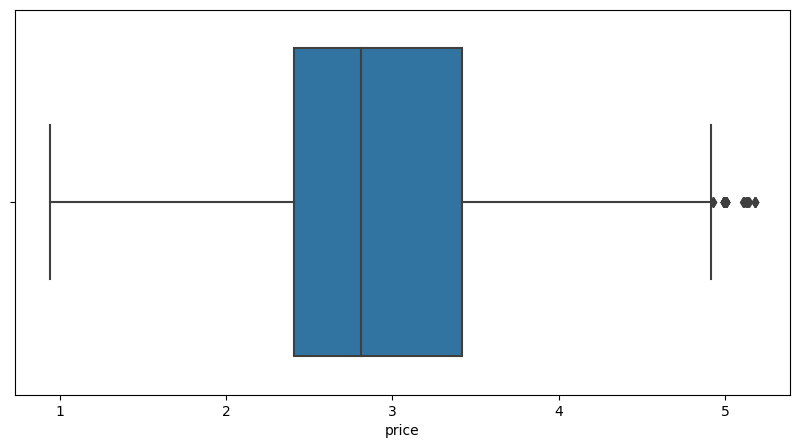

In [ ]:
#melakukan pengecheckan outlier
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='price')
plt.show()

### Handling Outlier Price

In [ ]:
# Print shape lama dari dataset yang belum di handling outliernya
print('Bentuk Shape Lama: ', train.shape)

# Kalkulasi batas atas dan bawah
Q1 = train['price'].quantile(0.25)
Q3 = train['price'].quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Menghapus outlier
train = train[(train['price'] >= lower) & (train['price'] <= upper)]
print('Bentuk Shape Baru: ', train.shape)

Bentuk Shape Lama:  (485149, 57)
Bentuk Shape Baru:  (485079, 57)


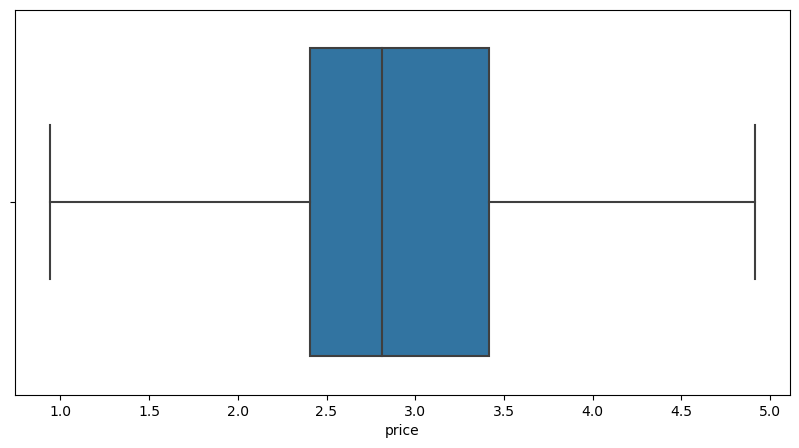

In [ ]:
# Melihat outlier yang sudah dilakukan handling pada atribut price
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x='price')
plt.show()

---
## Exploring Data Analysis (EDA)

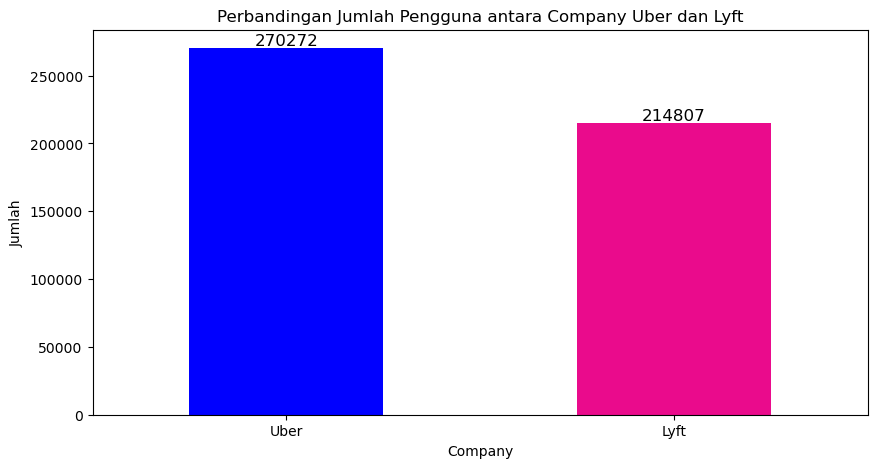

In [ ]:
company = train['cab_type'].value_counts()
plt.figure(figsize=(10, 5))
company.plot(kind='bar', color=['blue', '#EA0B8C'])

for i, count in enumerate(company):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Perbandingan Jumlah Pengguna antara Company Uber dan Lyft')
plt.xlabel('Company')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

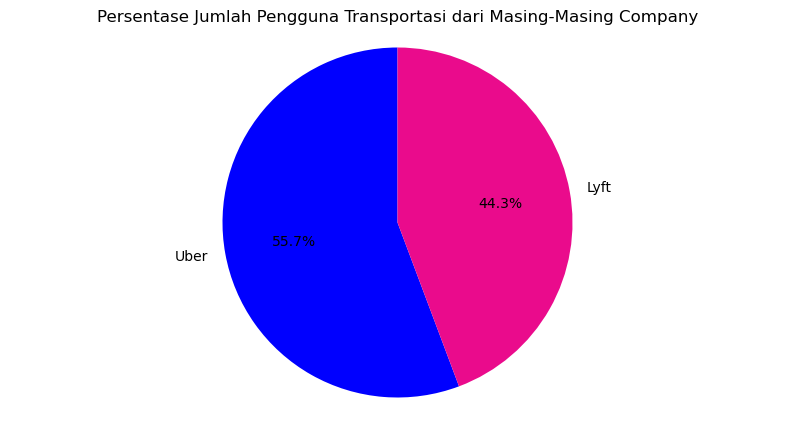

In [ ]:
# Persentase dari tital pengguna antar company
Label = company.index
Sizes = company.values

plt.figure(figsize=(10,5))
plt.pie(Sizes, labels=Label, colors=['blue', '#EA0B8C'], autopct='%1.1f%%', startangle=90)
plt.title('Persentase Jumlah Pengguna Transportasi dari Masing-Masing Company')
plt.axis('equal')
plt.show()

**Insight:**

Pada grafik batang, terlihat bahwa jumlah pengguna Uber sekitar 270.272 (55.7%) pengguna, sedangkan jumlah pengguna Lyft adalah sekitar 214.807 (44.3%) pengguna. Hal ini menunjukkan bahwa Uber memiliki pangsa pasar yang lebih besar daripada Lyft.

---

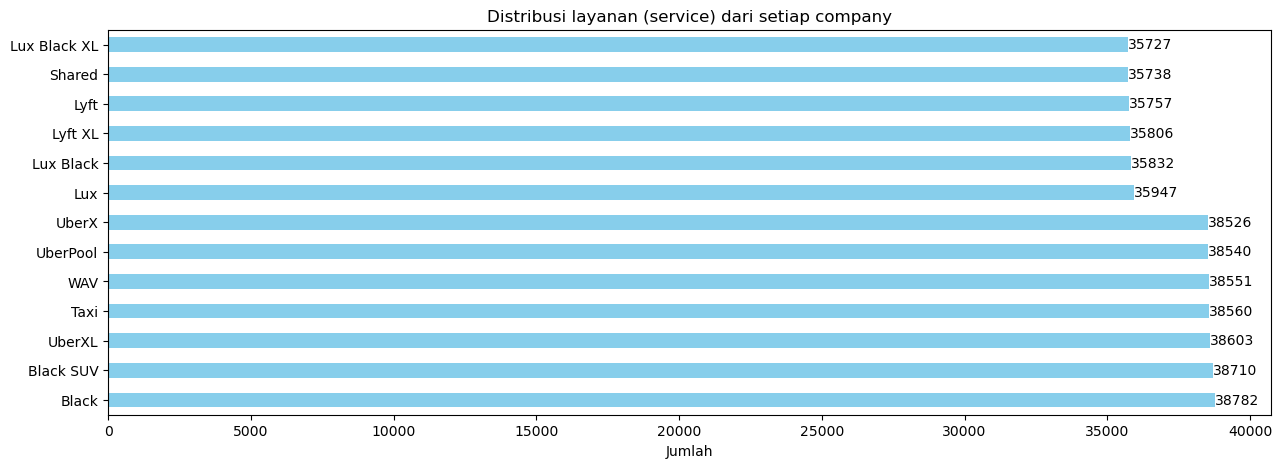

In [ ]:
#Menghitung jumlah jenis dari setiap company
service = train['name'].value_counts()

plt.figure(figsize=(15, 5))
ax = service.plot(kind='barh', color='skyblue')

for i, count in enumerate(service):
    ax.text(count + 0.1, i, str(count), va='center')

plt.title('Distribusi layanan (service) dari setiap company')
plt.xlabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

**Insight:**

Pada batang grafik, terlihat bahwa Uber menawarkan 7 layanan, sedangkan Lyft menawarkan 6 layanan. Hal ini menunjukkan bahwa Uber memiliki lebih banyak pilihan layanan untuk penggunanya.

Secara detail, dapat dijelaskan bahwa Uber menawarkan layanan yang lebih beragam daripada Lyft. Uber menawarkan layanan untuk berbagai kebutuhan, mulai dari transportasi umum hingga layanan premium. Lyft, di sisi lain, lebih fokus pada layanan transportasi umum.

---

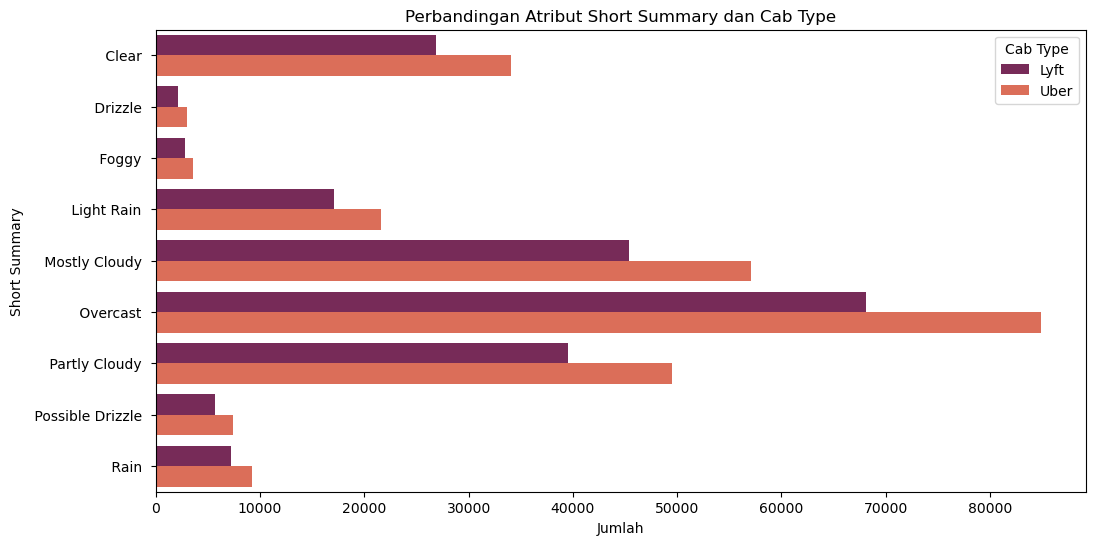

In [ ]:
weather_data = train.groupby(['short_summary', 'cab_type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='short_summary', hue='cab_type', data=weather_data, palette='rocket')

# Menambahkan judul dan label
plt.title('Perbandingan Atribut Short Summary dan Cab Type')
plt.xlabel('Jumlah')
plt.ylabel('Short Summary')
plt.legend(title='Cab Type')

plt.show()

**Insight:**

Berdasarkan visualisasi, pengguna lebih sering menggunakan layanan transportasi online pada saat kondisi cuaca Overcast baik pada company Uber atau pun Lyft. hal tersebut mungkin terjadi dikarenakan pengguna takut jika harus berjalan kaki atau menggunakan transportasi lainnya akan terkena hujan.

---

## Measure of Central Tendency

In [ ]:
mean = train.groupby('cab_type')['price'].mean()
print('Rata rata harga dari kedua company: \n', mean)

Rata rata harga dari kedua company: 
 cab_type
Lyft    2.910974
Uber    2.844153
Name: price, dtype: float64


In [ ]:
median = train['distance'].median()
print('nilai tengah dari atribut jarak pada pemesanan transportasi online sebesar', median)

nilai tengah dari atribut jarak pada pemesanan transportasi online sebesar 2.17


In [ ]:
modus = train['cab_type'].mode()[0]
print('Company mana yang paling sering digunakan adalah', modus)

Company mana yang paling sering digunakan adalah Uber


**Insight Measure of central tandency**

- **Mean:** Rata Rata harga dari masing masing company yaitu: company Lyft sekitar 2,910 USD sedangkan company Uber hanya sekitar 2,844 USD. Dari hasil mean tersebut kita menympilkan bahwa tarif pada Uber relatif lebih murang dibandingkan dengan lyft.
- **Median:** nilai tengah dari atribut jarak pada pemesanan transportasi online sebesar **2.17**
- **Modus:** Company yang memiliki jumlah pemesanan terbanyak atau yang paling sering di pesan oleh pengguna yaitu company **Uber**.

---

## Measure of Spread

In [ ]:
#range price transportasi online uber
uber = train[train['cab_type'].str.contains('uber', case=False)][['cab_type', 'price']]
min_uber = uber['price'].min()
max_uber = uber['price'].max()

#range price transportasi online lyft
lyft = train[train['cab_type'].str.contains('lyft', case=False)][['cab_type', 'price']]
min_lyft = lyft['price'].min()
max_lyft = lyft['price'].max()

print('Range price uber:', min_uber, max_uber)
print('Range price lyft:', min_lyft, max_lyft)

Range price uber: 1.572452908532383 4.887702873721513
Range price lyft: 0.9413734135618027 4.9137157195636085


In [ ]:
#mengetahui ukuran penyebaran data distance melalui standar deviasi
standard = train['distance'].std()
print(standard)

1.138806517517606


**Insight Measure of Spread:**

- **Range:** Range tarif harga uber sekitar 1.57 USD hingga 4.88 USD sedangkan range tarif harga lyft sekitar 0.94 USD hingga 4.91 USD.
- **Standard Deviasi:** hasil pengukuran penyebaran data pada atribut distance melalui standard deviasi yaitu memiliki nilai sebesar **1.138806517517606**

---

## Data PreProcessing

### Features Selection

In [ ]:
col_used = ['cab_type', 'name', 'source', 'destination', 'distance', 'surge_multiplier', 'icon', 'price']
train = train[col_used]
test = test[col_used]

### Encoding

In [ ]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encode_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=['cab_type', 'name', 'source', 'destination', 'icon']))
])

#Membuat variabel endcode_data untuk menampung hasil encode
encode_train = encode_pipeline.fit_transform(train)
encode_test = encode_pipeline.fit_transform(test)

In [ ]:
encode_train.head()

,cab_type,name,source,destination,distance,surge_multiplier,icon,price
216913,0,5,3,7,3.24,1.0,0,2.811969
488801,0,6,6,4,1.14,1.0,4,2.521332
277365,1,1,4,5,1.25,1.0,3,3.613478
28658,1,0,9,11,2.74,1.0,4,3.416100
668740,1,8,10,9,0.55,1.0,1,2.811969


In [ ]:
encode_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485079 entries, 216913 to 121958
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          485079 non-null  int32  
 1   name              485079 non-null  int32  
 2   source            485079 non-null  int32  
 3   destination       485079 non-null  int32  
 4   distance          485079 non-null  float64
 5   surge_multiplier  485079 non-null  float64
 6   icon              485079 non-null  int32  
 7   price             485079 non-null  float64
dtypes: float64(3), int32(5)
memory usage: 24.1 MB


### Checking Correlation

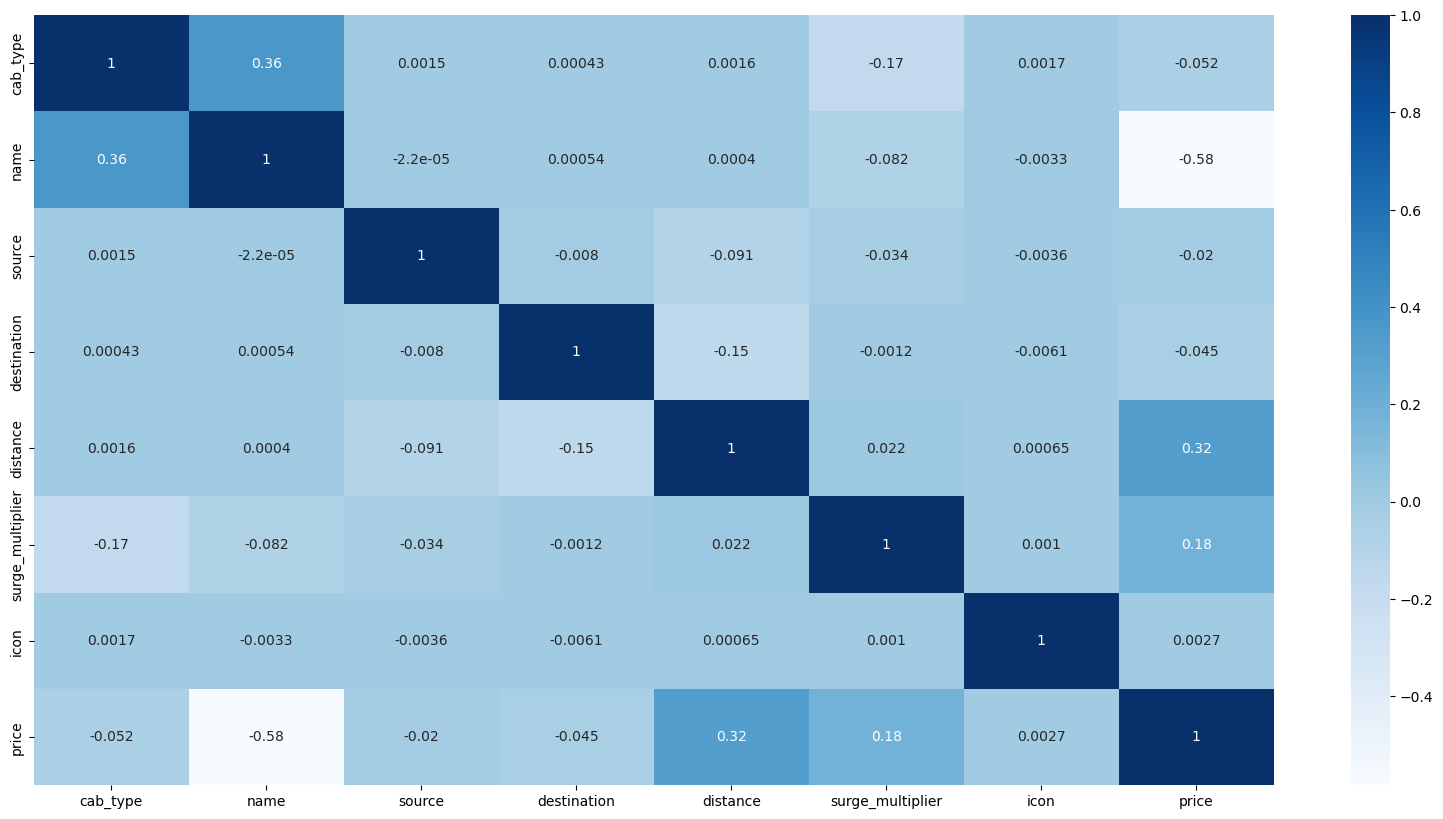

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(encode_train.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
print('Training set size:', encode_train.shape)
print('Test set size:', encode_test.shape)

Training set size: (485079, 8)
Test set size: (207922, 8)


In [ ]:
X_train = encode_train.drop('price', axis=1)
y_train = encode_train['price']

X_test = encode_test.drop('price', axis=1)
y_test = encode_test['price']

---
## Data Modelling

### Model Linear Regression

Alasan menggunakan algoritma Linear Regression dikarenakan metodenya yang sederhana, mudah dipahami dan diimplementasikan, dapat digunakan untuk data dengan dimensi yang besar, dan dapat digunakan untuk data yang tidak linear.

In [ ]:
#Melatih dan Evaluasi Model Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, pred_linear)
mae_linear = mean_absolute_error(y_test, pred_linear)
rmse_linear = mean_squared_error(y_test, pred_linear, squared=False)
r2_linear = r2_score(y_test, pred_linear)

print(f'Mean Squared Error (MSE): {mse_linear:.2f}')
print(f'Mean Absolute Error (MAE): {mae_linear:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_linear:.2f}')
print(f'Nilai R-squared dari model Regresi Linear sebesar: {r2_linear:.2f}')

Mean Squared Error (MSE): 0.20
Mean Absolute Error (MAE): 0.36
Root Mean Squared Error (RMSE): 0.45
Nilai R-squared dari model Regresi Linear sebesar: 0.50


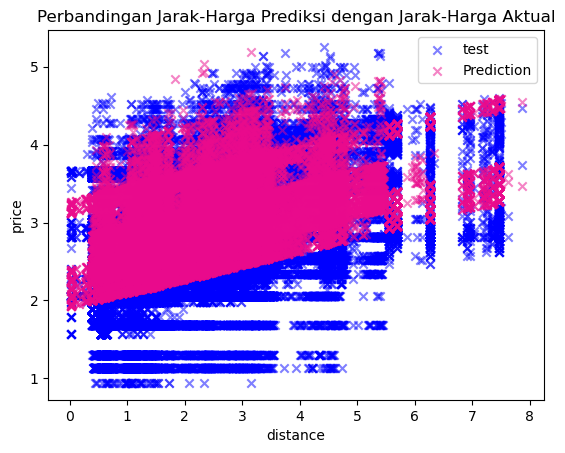

In [ ]:
x_axis = X_test.distance

plt.scatter(x_axis, y_test, c='blue', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, pred_linear, c='#EA0B8C', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price')
plt.title('Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual')
plt.legend(loc = 'upper right')
plt.show()

**Insight:**

Berdasarkan hasil diatas MSE, MAE, dan RMSE menunjukKan nilai yang relatif kecil, sehingga dapat dikatakan bahwa memprediksi besok akan turun hujan atau tidak menggunakan algoritma tersebut cukup akurat, namun perlu dilihat kembali bahwa nilai dari R-squared  hanya menunjukan 50% saja dari variabilitas data.

---

### Model Random Forest Regressor

Alasan menggunakan algoritma Random forest Regressor dikarenakan model tersebut dapat mengatasi masalah overfitting yang sering terjadi pada model linear regression. Overfitting adalah kondisi di mana model terlalu cocok dengan data latih, sehingga performanya menurun pada data uji serta prediksi yang dihasilkannya lebih kuat.

In [ ]:
#Melatih dan evaluasi Model Random Forest Regressor
random_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
pred_random = random_model.predict(X_test)

mse_random = mean_squared_error(y_test, pred_random)
mae_random = mean_absolute_error(y_test, pred_random)
rmse_random = sqrt(mean_squared_error(y_test, pred_random))
r2_random = r2_score(y_test, pred_random)

print(f'Mean Squared Error (MSE): {mse_random:.2f}')
print(f'Mean Absolute Error (MAE): {mae_random:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_random:.2f}')
print(f'R-squared (Coefficient of Determination): {r2_random:.2f}')

Mean Squared Error (MSE): 0.02
Mean Absolute Error (MAE): 0.08
Root Mean Squared Error (RMSE): 0.14
R-squared (Coefficient of Determination): 0.95


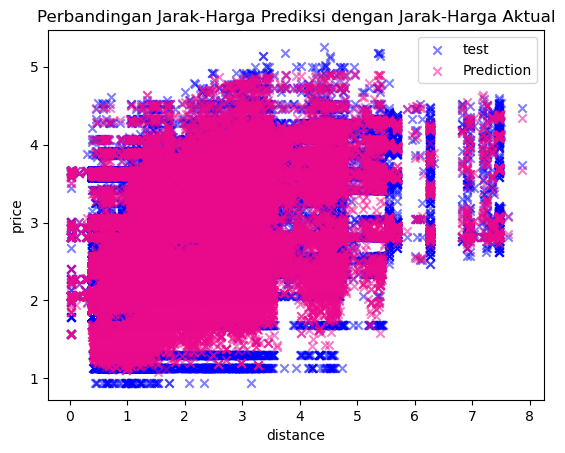

In [ ]:
x_axis = X_test.distance

plt.scatter(x_axis, y_test, c='blue', alpha = 0.5, marker = 'x', label = 'test')
plt.scatter(x_axis, pred_random, c='#EA0B8C', alpha = 0.5, marker = 'x', label = 'Prediction')
plt.xlabel('distance')
plt.ylabel('price')
plt.title('Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual')
plt.legend(loc = 'upper right')
plt.show()

**Insight:**

Berdasarkan hasil diatas MSE, MAE, dan RMSE menhasilkan nilai kesalahan yang sangat rendah, sehingga dapat dikatakan bahwa memprediksi besok akan turun hujan atau tidak menggunakan algoritma tersebut sangat akurat. Nilat R-squared sebesar 0,95 atau 95% dari variabilitas data dan pada algoritma ini memiliki kemampuannya untuk menangkap pola dan hubungan yang mendasarinya secara efektif.

---

## Model Inference

In [ ]:
X_train.head()

,cab_type,name,source,destination,distance,surge_multiplier,icon
216913,0,5,3,7,3.24,1.0,0
488801,0,6,6,4,1.14,1.0,4
277365,1,1,4,5,1.25,1.0,3
28658,1,0,9,11,2.74,1.0,4
668740,1,8,10,9,0.55,1.0,1


In [ ]:
cab_type = str(input('Cab Type: '))
name = str(input('Name: '))
source = str(input('Source: '))
destination = str(input('Destination: '))
distance = float(input('Distance: '))
surge_multiplier = float(input('Surge Multiplier: '))
icon = str(input('Icon: '))

# Menyiapkan data untuk prediksi
dataInference = {
    'cab_type': [cab_type],
    'name': [name],
    'source': [source],
    'destination': [destination],
    'distance': [distance],
    'surge_multiplier': [surge_multiplier],
    'icon': [icon],
}

# Create a DataFrame from the dictionary
dataInference_df = pd.DataFrame(dataInference)

# Use LabelEncoder for categorical columns
encoder = LabelEncoder()
categorical_columns = ['cab_type', 'name', 'source', 'destination', 'icon']
for column in categorical_columns:
    dataInference_df[column] = encoder.fit_transform(dataInference_df[column])

# Convert DataFrame to NumPy array
dataInference_encoded = dataInference_df.values.reshape(1, -1)

# Melakukan prediksi
pred_inference1 = linear_model.predict(dataInference_encoded)
pred_inference2 = random_model.predict(dataInference_encoded)

# Menampilkan hasil prediksi
print('Prediksi Tarif Harga Transportasi online dengan Model Linear Regression yaitu:', pred_inference1)
print('Prediksi Tarif Harga Transportasi online dengan Model Random Forest Regressor yaitu:', pred_inference2)


Prediksi Tarif Harga Transportasi online dengan Model Linear Regression yaitu: [3.82047464]
Prediksi Tarif Harga Transportasi online dengan Model Random Forest Regressor yaitu: [3.84038414]


---
---

## **CONCLUSION**

Dari analisis di atas, dapat diambil beberapa kesimpulan:
1. Dari 57 atribut yang ada, diambil hanya 8 atribut yang paling berpengaruh, diantaranya yaitu: cab_type, name, source, destination, distance, surge_multiplier, icon dan price.
2. Metode pengujian menggunakan 2 model algoritma, yaitu Linear Regression, dan Random Forest Regression, dari masing masing algoritma tersebut menghasilkan akurasi sebesar 50% dan 95%.
3. Model Random Forest Regression adalah model yang paling optimal dalam memprediksi tarif transportasi online, dengan MSE: 0.02, MAE: 0.08, dan RMSE: 0.14.


---
---
